# Project 1: California


## Due Sunday, April 26 at 11:59pm

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests.

In [2]:
# Don't change this cell; just run it
import numpy as np
import babypandas as bpd

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('project.ok')
_ = ok.auth(inline=True)

In this project we'll explore some data about California. The project is a little longer than a homework, but the questions may require you to **"put the pieces together"** more than a typical homework question. You may have to perform several steps to answer a question. Remember that you can always save intermediate results!

The datasets in this project consist of real-world data, cleaned slighty for ease of use. As such, there are occasional anomalies that you'll have to look out for and handle specially. You are encouraged to ask your own questions and try to answer them using these datasets!

### Logistics

**Deadline.** This project is due at **11:59pm on Sunday April 26th**. It's much better to be early than late, so start working now.

**Plotting Questions**: The plots for the project are **optional** and ungraded, meaning you do **not** need to submit a PDF of this notebook to Gradescope. Hoewever, the plotting questions are good practice for the midterm.

**Partners.** You may work with one other partner; only one of you is required to submit the project. On okpy.org, the person who submits should also designate their partner so that both of you receive credit.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers or code. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Campuswire, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Campuswire post and the staff will respond. If you're ever feeling overwhelmed or don't know how to make progress, send a private Campuswire post to instructors for help.

**Tests.** The tests that are given are not comprehensive and passing the tests for a question does not mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work!

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. Make sure that you are using distinct and meaningful variable names throughout the notebook. Along that line, DO NOT reuse the variable names that we use when we grade your answers, otherwise there is the chance that our tests will grade against a variable that's not what you intened (especially if you run the notebook out of order!).

You never have to use just one line in this project or any others. Use intermediate variables and multiple lines as much as you would like!

## 1. California Climates

<img src="./jtree.jpg"/>

California consists of many different climates -- from the southern deserts to the alpine conditions in the High Sierra. We'll start by getting a sense of what Californian land is like.

**Question 1.1.** The file `data/landtype.csv` contains information from the US Geological Survey on land type for the entire United States. Read it into a DataFrame named `us_land`.

In [2]:
#... us_land
us_land = bpd.read_csv('data/landtype.csv')
us_land

,intStCode,strStName,intClassCode,strClassName,strFormCode,strFormName,strMacroCode,strMacroName,intEcoSysCode,strEcoSysName,intAcres,intSqMiles
0,12,Florida,1,Forest & Woodland,1.A.1,Tropical Dry Forest & Woodland,M134,Caribbean Coastal Lowland Dry Forest,4132,South Florida Hardwood Hammock,1851.881860,2.893565
1,12,Florida,1,Forest & Woodland,1.A.1,Tropical Dry Forest & Woodland,M134,Caribbean Coastal Lowland Dry Forest,4135,Southeast Florida Coastal Strand and Maritime ...,5386.180710,8.415907
2,12,Florida,1,Forest & Woodland,1.A.1,Tropical Dry Forest & Woodland,M134,Caribbean Coastal Lowland Dry Forest,4134,Southwest Florida Coastal Strand and Maritime ...,401.867482,0.627918
3,12,Florida,1,Forest & Woodland,1.A.4,Tropical Flooded & Swamp Forest,M617,Caribbean Swamp,9238,South Florida Bayhead Swamp,84991.747692,132.799606
4,12,Florida,1,Forest & Woodland,1.A.4,Tropical Flooded & Swamp Forest,M617,Caribbean Swamp,9702,South Florida Cypress Dome,217214.377840,339.397465
...,...,...,...,...,...,...,...,...,...,...,...,...
3816,50,Vermont,12,Nonvascular & Sparse Vascular Rock Vegetation,12.A,Barren,12.A,Barren,3105,Undifferentiated Barren Land,8745.454819,13.664773
3817,25,Massachusetts,12,Nonvascular & Sparse Vascular Rock Vegetation,12.A,Barren,12.A,Barren,3105,Undifferentiated Barren Land,46742.058590,73.034467
3818,48,Texas,12,Nonvascular & Sparse Vascular Rock Vegetation,12.A,Barren,12.A,Barren,3105,Undifferentiated Barren Land,27436.184636,42.869038
3819,41,Oregon,12,Nonvascular & Sparse Vascular Rock Vegetation,12.A,Barren,12.A,Barren,3105,Undifferentiated Barren Land,6.227056,0.009730


In [3]:
_ = ok.grade('q1_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The USGS breaks the United States into 3821 regions; each row in the table contains information about one region. Out of the table's 12 columns, the important ones are:

<table>
    <tr>
        <th>Column Name</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>strStName</td>
        <td>state name</td>
    </tr>
    <tr>
        <td>strClassName</td>
        <td>land class</td>
    </tr>
    <tr>
        <td>strEcoSysName</td>
        <td>ecological system</td>
    </tr>
    <tr>
        <td>intSqMiles</td>
        <td>size in square miles</td>
    </tr>
</table>

**Question 1.2.** To make the data easier to work with, let's keep only the columns listed above and give them better names. Create a new DataFrame named `us_land_renamed` which contains four columns: "State", "Class", "EcologicalSystem", and "SquareMiles", containing the state name, land type, ecological system, and size of each region, respectively.

In [4]:
#... us_land_renamed
us_land_renamed = bpd.DataFrame().assign(
    State=us_land.get('strStName'),
    Class=us_land.get('strClassName'),
    EcologicalSystem=us_land.get('strEcoSysName'),
    SquareMiles=us_land.get('intSqMiles')
)
us_land_renamed

,State,Class,EcologicalSystem,SquareMiles
0,Florida,Forest & Woodland,South Florida Hardwood Hammock,2.893565
1,Florida,Forest & Woodland,Southeast Florida Coastal Strand and Maritime ...,8.415907
2,Florida,Forest & Woodland,Southwest Florida Coastal Strand and Maritime ...,0.627918
3,Florida,Forest & Woodland,South Florida Bayhead Swamp,132.799606
4,Florida,Forest & Woodland,South Florida Cypress Dome,339.397465
...,...,...,...,...
3816,Vermont,Nonvascular & Sparse Vascular Rock Vegetation,Undifferentiated Barren Land,13.664773
3817,Massachusetts,Nonvascular & Sparse Vascular Rock Vegetation,Undifferentiated Barren Land,73.034467
3818,Texas,Nonvascular & Sparse Vascular Rock Vegetation,Undifferentiated Barren Land,42.869038
3819,Oregon,Nonvascular & Sparse Vascular Rock Vegetation,Undifferentiated Barren Land,0.009730


In [5]:
_ = ok.grade('q1_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.3.** We only care about California! Create a table called `ca_land` which contains only the regions in California. Furthermore, remove the "State" column, since it is no longer informative.

In [6]:
#... ca_land
ca_land = us_land_renamed[us_land_renamed.get('State') == 'California'].drop(columns='State')
ca_land

,Class,EcologicalSystem,SquareMiles
52,Forest & Woodland,East Gulf Coastal Plain Near-Coast Pine Flatwo...,0.032664
126,Forest & Woodland,California Central Valley Mixed Oak Savanna,4350.262403
128,Forest & Woodland,California Coastal Closed-Cone Conifer Forest ...,85.943097
131,Forest & Woodland,California Coastal Live Oak Woodland and Savanna,1726.148156
133,Forest & Woodland,California Lower Montane Blue Oak-Foothill Pin...,6587.099312
...,...,...,...
3685,Open Water,Open Water (Brackish/Salt),5165.944140
3737,Open Water,Open Water (Fresh),2000.243893
3749,Nonvascular & Sparse Vascular Rock Vegetation,North American Alpine Ice Field,3.076346
3766,Nonvascular & Sparse Vascular Rock Vegetation,Unconsolidated Shore,50.668495


In [7]:
_ = ok.grade('q1_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.4.** We are interested in how much of California's land is Forest & Woodland, how much is Open Water, and so on. Create a table named `ca_classes` with two columns, "SquareMiles" and "Percentage", containing the total area in square miles and the total percentage (as a number between 0 and 100) of California that is made up of each land class. The label of each row should be a land class. That is, your table should look like this (but with the `?`s replaced by numbers):

<img width=50% src="./q1_output.png"/>

In [8]:
#... ca_classes
ca_classes = ca_land.assign(
    Percentage= 100 * ca_land.get('SquareMiles') / ca_land.get('SquareMiles').sum()
).groupby('Class').sum()
ca_classes

,SquareMiles,Percentage
Class,,
Agricultural & Developed Vegetation,16236.702451,9.950369
Aquatic Vegetation,29.515271,0.018088
Desert & Semi-Desert,43406.217253,26.600714
Developed & Other Human Use,11170.230660,6.845474
Forest & Woodland,53165.885685,32.581750
...,...,...
Open Rock Vegetation,265.053649,0.162433
Open Water,7166.188032,4.391669
"Polar & High Montane Scrub, Grassland & Barrens",2519.585196,1.544082


In [9]:
_ = ok.grade('q1_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.5.** Create a horizontal bar chart showing the percentage of California that is made up of each land class. Only show the land classes with the top 6 percentage values, omit the rest. Make sure that the bars are sorted, from shortest at the top to longest at the bottom.

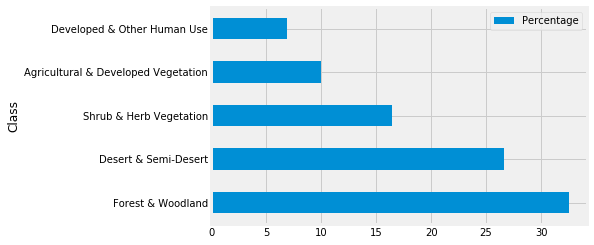

In [10]:
#- write your code here
ca_classes.sort_values(by='Percentage', ascending=False).iloc[:5].plot(kind='barh', y='Percentage')

**Question 1.6.** Notice that California has a high percentage of forest & woodland. Let's compare California's total Forest & Woodland (F & W) area in square miles, to the total F & W are in square miles across all states. 

Find the total F & W area in square miles accross all states. In the variable `ratio`, store the value: 
<br><br>
(California's total F & W area in square miles) / (Total F & W area across all states in square miles)
<br><br>
Hint: Reuse the `us_land_renamed` from before, but don't drop the states column. You can also use `ca_classes`.

In [11]:
# ... ratio
all_states = us_land_renamed[us_land_renamed.get("Class") == "Forest & Woodland"]
val1 = all_states.get("SquareMiles").sum()
val2 = ca_classes.get("SquareMiles").sort_values(ascending=False).loc["Forest & Woodland"]
ratio = val2 / val1
ratio

0.05380802449217054

In [12]:
_ = ok.grade('q1_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 1.7.** Finally, let's count how many of each class of land there is in the US. Using the `us_land_renamed`, count the total number of each `Class`, and store the result in a table. The index of the table should be the class types. Apart from the index, it should have a single column which stores the counts. This column may have any name. Store the resulting table in the variable `class_counts`.

In [13]:
#... class_counts
class_counts = us_land_renamed.groupby("Class").count().drop(columns = ["EcologicalSystem", "SquareMiles"])
class_counts

,State
Class,
Agricultural & Developed Vegetation,114
Aquatic Vegetation,4
Desert & Semi-Desert,295
Developed & Other Human Use,239
Forest & Woodland,1728
...,...
Open Rock Vegetation,80
Open Water,78
"Polar & High Montane Scrub, Grassland & Barrens",49


In [14]:
_ = ok.grade('q1_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2. Beaches and Coast

<img width=85% src="./beach.jpg"/>

California has over 3,400 miles of shoreline. The [California Coastal Commission](https://en.wikipedia.org/wiki/California_Coastal_Commission) is a public agency charged with managing the coast and ensuring that all Californians have access to the ocean.

The California Coastal Commission maintains a list of all of the named beaches in the state. The file `beaches.csv` contains this information:

In [4]:
beaches = bpd.read_csv('data/beaches.csv')
beaches

,COUNTY,PARKING,FEE,LATITUDE,LONGITUDE,NAME,LOCATION,DESCRIPTION
0,Del Norte,Yes,No,41.992854,-124.208809,Pelican State Beach,"W. of Hwy. 101, .5 mi. S. of Oregon border","Wide beach with driftwood, day use only"
1,Del Norte,Yes,No,41.973501,-124.203663,Clifford Kamph Memorial Park,"Hwy. 101 , 2 mi. S. of the Oregon border",Camp host on-site
2,Del Norte,Yes,No,41.947699,-124.205046,Smith River County Park,"End, Mouth of Smith River Rd., Smith River","Cobble beach at river mouth, birding"
3,Del Norte,Yes,Yes,41.890326,-124.147810,Smith River Boating Access,"Fred Haight Dr., 3 mi. S. of Town of Smith River",Paved boat ramp
4,Del Norte,Yes,No,41.869112,-124.211624,Kellogg Beach Park,W. end of Kellogg Rd.,"Wide beach, driftwood"
5,Del Norte,Yes,Yes,41.797890,-124.216021,Lake Earl Wildlife Area,W. of Lower Lake Rd. and Lake Earl Dr.,"5,500-acre wildlife area, trails, boat launch"
6,Del Norte,Yes,No,41.813705,-124.180635,Lakeview Drive Boat Launch,End of Lakeview Dr. off Lake Earl Dr.,"Shallow draft boat launch, Lake Earl Wildlife ..."
7,Del Norte,Yes,Yes,41.881739,-124.200689,Tolowa Dunes State Park,N. and S. of Kellogg Rd. along Pacific Ocean,Walk-in campsites; pay camping fee at Redwood ...
8,Del Norte,Yes,No,41.782673,-124.252560,Point St. George,End of Radio Rd. aka N. Pebble Beach Dr.,"Rocky shore, respect sensitive resources"
9,Del Norte,Yes,Yes,41.852301,-124.120828,Ruby Van Deventer County Park,"North Bank Rd. (Hwy. 197), 2.5 mi. E. of Hwy. 101","Site overlooks the Smith River, running water ..."


The table below shows all of the columns in the DataFrame and their contents:

<table>
    <tr>
        <th>
            Column Name
        </th>
        <th>
            Description
        </th>
    </tr>
    <tr>
        <td>
            COUNTY
        </td>
        <td>
            Name of the county in which the beach is located
        </td>
    </tr>
    <tr>
        <td>
            PARKING
        </td>
        <td>
            Whether or not there is parking at the beach
        </td>
    </tr>
    <tr>
        <td>
            FEE
        </td>
        <td>
            Whether or not there is a fee to access the beach
        </td>
    </tr>
    <tr>
        <td>
            LATITUDE
        </td>
        <td>
            The beach's latitude
        </td>
    </tr>
    <tr>
        <td>
            LOGITUDE
        </td>
        <td>
            The beach's longitude
        </td>
    </tr>
    <tr>
        <td>
            NAME
        </td>
        <td>
            Name of the beach
        </td>
    </tr>
    <tr>
        <td>
            LOCATION
        </td>
        <td>
            A description of the beach's location
        </td>
    </tr>
    <tr>
        <td>
            DESCRIPTION
        </td>
        <td>
            A short description of the beach
        </td>
    </tr>
</table>

**Question 2.1.** Which county has the second most ***paid*** beaches?

In [16]:
#... second_most_paid_beaches
second_most_paid_beaches = (
    beaches[beaches.get('FEE') == 'Yes']
    .groupby('COUNTY')
    .count()
    .sort_values('FEE')
).index[-2]
second_most_paid_beaches

'Monterey'

In [17]:
_ = ok.grade('q2_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.2.** Expensive beaches usually have more tourists and more facilities. Does that mean there is also access to parking? Let's find the percentage of paid and free beaches that have a parking service and compare. Respond **True** or **False** to `paid_parking`. True if paid beaches have a higher parking ratio, false otherwise. (Calculate the ratios individually for paid and free beaches.

In [80]:
#... paid_parking
paid = beaches[beaches.get('FEE') == 'Yes']
paid_parking = paid[paid.get('PARKING') == 'Yes']
free = beaches[beaches.get('FEE') == 'No']
free_parking = free[free.get('PARKING') == 'Yes']
paid_parking = (paid_parking.shape[0] / paid.shape[0]) > (free_parking.shape[0] / free.shape[0])
paid_parking

True

In [81]:
_ = ok.grade('q2_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.3.** How many beaches in Los Angeles county do not have a fee and do have parking? Store your result in `los_angeles_free_beaches_with_parking`

In [82]:
#... los_angeles_free_beaches_with_parking
los_angeles_free_beaches_with_parking = (
    beaches[
        (beaches.get('COUNTY') == 'Los Angeles') 
        & 
        (beaches.get('PARKING') == 'Yes') 
        & 
        (beaches.get('FEE') == 'No')
    ]).shape[0]
los_angeles_free_beaches_with_parking

97

In [83]:
_ = ok.grade('q2_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The California State Guide is publishing a favorite beach ranking that is asking you to rate the top beaches across the state. The given criteria is straightforward: 3 stars for beaches with free parking, 2 stars for beaches with paid parking or free beaches with no parking, 1 star for paid beaches with no parking.

**Question 2.4.** To begin, we must clean our data first. We will be working with the first three columns, *COUNTY*, *PARKING*, *FEE*, so drop the irrelevant columns. Replace the strings **Yes** and **No** in the `PARKING` and `FEE` columns with 1 and 0 respectively. Save your processed dataframe in `processed_beaches`.

*Hint: You can check all the unqie values in a column by `np.unique(Series)`. There is a built in function for the replacement.*

In [10]:
# for processed_beaches_1 and ratings_1
def replace(x):
    if x=='Yes':return 1
    if x=='No' or x=='No ': return 0

In [5]:
# for processed_beaches_2 and ratings_2
def replace_parking(x):
    if x=='Yes':return 1
    if x=='No' or x=='No ': return 0

In [6]:
# for processed_beaches_2 and ratings_2
def replace_fee(x):
    if x=='Yes':return 0
    if x=='No' or x=='No ': return 1

In [11]:
#... processed_beaches_1
processed_beaches_1 = beaches.get(['COUNTY', 'PARKING', 'FEE'])
processed_beaches_1 = processed_beaches_1.assign(PARKING=processed_beaches_1.get('PARKING').apply(replace))
processed_beaches_1 = processed_beaches_1.assign(FEE=processed_beaches_1.get('FEE').apply(replace))
processed_beaches_1

,COUNTY,PARKING,FEE
0,Del Norte,1,0
1,Del Norte,1,0
2,Del Norte,1,0
3,Del Norte,1,1
4,Del Norte,1,0
5,Del Norte,1,1
6,Del Norte,1,0
7,Del Norte,1,1
8,Del Norte,1,0
9,Del Norte,1,1


In [12]:
#... processed_beaches_2
processed_beaches_2 = beaches.get(['COUNTY', 'PARKING', 'FEE'])
processed_beaches_2 = processed_beaches_2.assign(PARKING=processed_beaches_2.get('PARKING').apply(replace_parking))
processed_beaches_2 = processed_beaches_2.assign(FEE=processed_beaches_2.get('FEE').apply(replace_fee))
processed_beaches_2

,COUNTY,PARKING,FEE
0,Del Norte,1,1
1,Del Norte,1,1
2,Del Norte,1,1
3,Del Norte,1,0
4,Del Norte,1,1
5,Del Norte,1,0
6,Del Norte,1,1
7,Del Norte,1,0
8,Del Norte,1,1
9,Del Norte,1,0


In [13]:
_ = ok.grade('q2_4')

NameError: name 'ok' is not defined

**Question 2.5.** Now create a new dataframe with the average rating for each county and save it in `ratings`. The first few rows of your answer should look like this.

<img width=30% src="./q25_output.png"/>

In [18]:
#...ratings_1
with_rating_1 = processed_beaches_1.assign(
    RATING = processed_beaches_1.get('PARKING') + processed_beaches_1.get('FEE') + 1
)
ratings_1 = bpd.DataFrame().assign(RATING=with_rating_1.groupby('COUNTY').mean().get('RATING'))
ratings_1

,RATING
COUNTY,
Del Norte,2.239130
Humboldt,2.051020
Los Angeles,2.191964
Marin,2.069767
Mendocino,2.100000
Monterey,2.198529
Orange,2.053435
San Diego,2.091371
San Francisco,2.083333


In [21]:
#...ratings_2
with_rating_2 = processed_beaches_2.assign(
    RATING = processed_beaches_2.get('PARKING') + processed_beaches_2.get('FEE') + 1
)
ratings_2 = bpd.DataFrame().assign(RATING=with_rating_2.groupby('COUNTY').mean().get('RATING'))
ratings_2

,RATING
COUNTY,
Del Norte,2.717391
Humboldt,2.785714
Los Angeles,2.388393
Marin,2.651163
Mendocino,2.520000
Monterey,2.610294
Orange,2.519084
San Diego,2.705584
San Francisco,2.638889


In [88]:
_ = ok.grade('q2_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.6.** Highway 101 stretches from Los Angeles to the Canadian border. How many beaches in the dataset are on Highway 101? *Hint*: Look for the string "Hwy. 101".

In [89]:
#... number_on_101
number_on_101 = beaches[beaches.get('LOCATION').str.contains('Hwy. 101')].shape[0]
number_on_101

84

In [90]:
_ = ok.grade('q2_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.7.** Plot a density histogram of the beach locations by longitude. Use 15 bins.

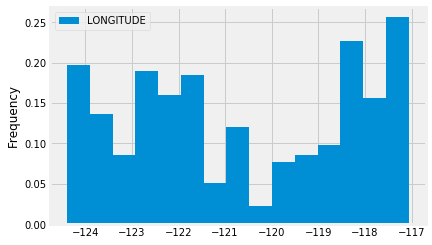

In [91]:
beaches.plot(kind='hist', y='LONGITUDE', bins=15, density=True)

**Question 2.8.** What is the name of the southernmost beach in California?

In [92]:
#... southernmost_beach
southernmost_beach = beaches.sort_values('LATITUDE').get('NAME').iloc[0]
southernmost_beach

'Tijuana River Valley Regional Park'

In [93]:
_ = ok.grade('q2_8')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 3. Climate Change

<img width=90% src="./scripps.jpg"/>

California has plenty of coastline, but it is eroding at an alarming rate due to rising sea levels. The USGS [estimates](https://www.usgs.gov/news/sea-level-rise-could-double-erosion-rates-southern-california-coastal-cliffs) that bluffs along the coast of Southern California could be suffer erosion of anywhere from 65 to 135 feet by the year 2100.

The file `sea_temp.csv` contains historical measurements of the surface temperature (in Celsius) of the water at the La Jolla oceanographic station; `sea_level.csv` contains measurements of the sea level relative to a global baseline (in meters).

In [94]:
sea_temp= bpd.read_csv('data/sea_temp.csv')
sea_temp

,YEAR,MONTH,DAY,SURFACE_TEMP
0,1916,8,22,19.5
1,1916,8,23,19.9
2,1916,8,24,19.7
3,1916,8,25,19.7
4,1916,8,26,19.5
...,...,...,...,...
36292,2019,5,26,18.0
36293,2019,5,27,17.6
36294,2019,5,28,17.1
36295,2019,5,29,18.1


In [95]:
sea_level = bpd.read_csv('data/sea_level.csv')
sea_level

,year,month,level
0,1924,11,-0.225
1,1924,12,-0.195
2,1925,1,-0.198
3,1925,2,-0.207
4,1925,3,-0.150
...,...,...,...
1136,2019,7,0.006
1137,2019,8,-0.008
1138,2019,9,0.036
1139,2019,10,0.020


**Question 3.1.** Create a new table named `sea_level_rounded` which has the same three columns as `sea_level`, but where the "level" column is rounded to 2 decimal points.


In [96]:
#... sea_level_rounded
sea_level_rounded = sea_level.assign(level=np.round(sea_level.get('level'),2))

sea_level_rounded

,year,month,level
0,1924,11,-0.22
1,1924,12,-0.20
2,1925,1,-0.20
3,1925,2,-0.21
4,1925,3,-0.15
...,...,...,...
1136,2019,7,0.01
1137,2019,8,-0.01
1138,2019,9,0.04
1139,2019,10,0.02


In [97]:
_ = ok.grade('q3_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.2.** Create a new table named `sea_temp_kelvin` which has the same three columns as `sea_temp`, but where the "SURFACE_TEMP" column is measured in kelvin instead of Celsius and give this column a new name ‘SURFACE_TEMP_K”.


In [98]:
#... sea_temp_kelvin
sea_temp_kelvin=sea_temp.assign(SURFACE_TEMP_K=sea_temp.get('SURFACE_TEMP') + 273.15)
sea_temp_kelvin = sea_temp_kelvin.drop(columns=['SURFACE_TEMP'])
sea_temp_kelvin

,YEAR,MONTH,DAY,SURFACE_TEMP_K
0,1916,8,22,292.65
1,1916,8,23,293.05
2,1916,8,24,292.85
3,1916,8,25,292.85
4,1916,8,26,292.65
...,...,...,...,...
36292,2019,5,26,291.15
36293,2019,5,27,290.75
36294,2019,5,28,290.25
36295,2019,5,29,291.25


In [99]:
_ = ok.grade('q3_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.3.** Create a new table named `sea_averages` which contains one row for each year and two columns: "TEMPERATURE", containing the average sea temperature in Kelvin for each year, and "LEVEL", containing the average sea level in meter for each year. Note that historical temperatures go back to 1916, but historical sea level measurements only go back to 1924. Therefore your table will only have rows for 1924 to 2019. The index of your table should contain the years.

*Hint*: As always, you can create intermediate variables.



In [100]:
#... sea_averages
avg_temp = sea_temp_kelvin.groupby('YEAR').mean()
avg_level = sea_level_rounded.groupby('year').mean()

sea_averages_temp = (
    avg_temp._pd.merge(avg_level._pd, left_index=True, right_index=True)
).get(['SURFACE_TEMP_K', 'level'])

sea_averages = bpd.DataFrame().assign(
    TEMPERATURE=sea_averages_temp.get('SURFACE_TEMP_K'),
    LEVEL=sea_averages_temp.get('level')
)
sea_averages

,TEMPERATURE,LEVEL
1924,289.586808,-0.210000
1925,290.182329,-0.148333
1926,291.231096,-0.121667
1927,290.030274,-0.150000
1928,289.895082,-0.128333
...,...,...
2015,292.735294,0.124167
2016,291.817925,0.037500
2017,291.741030,0.027500
2018,292.232581,0.038333


In [101]:
_ = ok.grade('q3_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.4.** Add a column called “INCREASE” to sea_averages dataframe that checks if the sea level in that year increased or not. Save it into a new dataframe called `sea_averages_added`.


In [102]:
#... sea_averages_added
sea_averages_added = sea_averages.assign(INCREASE=sea_averages.get('LEVEL')>0) 
sea_averages_added.get('INCREASE').sum()


23

In [103]:
_ = ok.grade('q3_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.5** Consider the following two values: average temperature of years with increased sea level,  average temperature of years with decreased sea level. What was the difference between these two values? (Hint: your answer should be negative.)


In [104]:
#... avg_temp_difference
group1 = sea_averages_added.groupby('INCREASE').mean().get('TEMPERATURE').iloc[0]
group2 = sea_averages_added.groupby('INCREASE').mean().get('TEMPERATURE').iloc[1]
avg_temp_difference=group1-group2
avg_temp_difference


-1.1669224132705835

In [105]:
_ = ok.grade('q3_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Now let's plot the yearly average surface temperature in Fahrenheit as a line plot, with year on the horizontal axis:

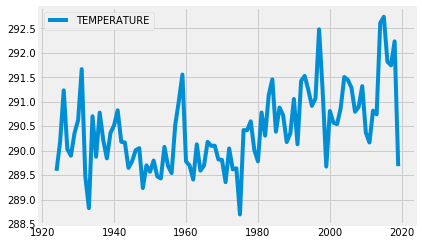

In [106]:
#- your code here
sea_averages.plot(y='TEMPERATURE')

Let's plot the yearly average sea level in inches as a line plot, with year on the horizontal axis:

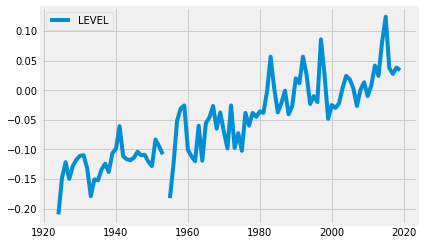

In [107]:
sea_averages.plot(y='LEVEL')

If your `sea_averages` is right, you should notice a linear increase in the sea level.

**Question 3.6.** In the 21th century (including 2000), what percentage of the years have an increased sea level? 

In [108]:
#... percentage_year_increased
percentage_year_increased = (
    sea_averages_added[(sea_averages_added.index>=2000) & (sea_averages_added.get('INCREASE')) == True]
                      .shape[0]/sea_averages_added[sea_averages_added.index>=2000].shape[0]
)
percentage_year_increased

0.75

In [109]:
_ = ok.grade('q3_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.7.** What is the median temperature in Kelvin of all the measurements in the 20th century? (doesn't include 2000, round your answer to two decimal points)


In [110]:
#... last_century_med
last_century_med=round(sea_temp_kelvin[sea_temp_kelvin.get('YEAR') <2000].get('SURFACE_TEMP_K').median(),2)
last_century_med

289.95

In [111]:
_ = ok.grade('q3_7')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.8.** What is the median temperature in Kelvin of all the measurements in the 21th century?
(round your answer to two decimal points)


In [112]:
#this_century_med
this_century_med=round(sea_temp_kelvin[sea_temp_kelvin.get('YEAR') >=2000].get('SURFACE_TEMP_K').median(),2)
this_century_med


290.85

In [113]:
_ = ok.grade('q3_8')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 3.9.** Make a scatter plot of the yearly average temperature on the horizontal axis versus the yearly average sea level on the vertical axis.

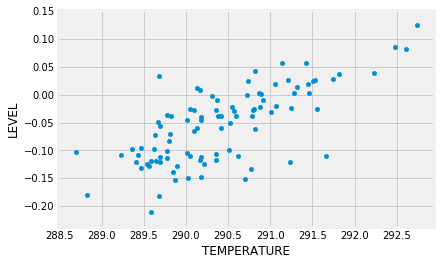

In [52]:
sea_averages.plot(kind='scatter', x='TEMPERATURE', y='LEVEL')

## 4. California's Renewable Energy

<img width=85% src="wind_energy.jpg"/>

To combat climate change, California has increasingly generated its energy from renewable resources, such as solar and wind power. The file `energy.csv` contains hourly measurements of the amount of energy produced in California by various renewable sources in megawatts between April 2010 and January 2018.

In [53]:
energy_raw = bpd.read_csv('data/energy.csv').set_index('TIMESTAMP')
energy_raw

,BIOGAS,BIOMASS,GEOTHERMAL,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
TIMESTAMP,,,,,,,,
2011-07-21 00:00:00,177.0,372.0,984.0,516.0,0.0,0.0,0.0,1607.0
2011-07-21 01:00:00,176.0,373.0,984.0,509.0,0.0,0.0,0.0,1619.0
2011-07-21 02:00:00,177.0,371.0,985.0,506.0,0.0,0.0,0.0,1660.0
2011-07-21 03:00:00,177.0,374.0,985.0,504.0,0.0,0.0,0.0,1633.0
2011-07-21 04:00:00,177.0,377.0,984.0,508.0,0.0,0.0,0.0,1520.0
...,...,...,...,...,...,...,...,...
2013-01-28 19:00:00,209.0,331.0,924.0,404.0,0.0,0.0,0.0,2633.0
2013-01-28 20:00:00,207.0,334.0,924.0,372.0,0.0,0.0,0.0,2540.0
2013-01-28 21:00:00,208.0,342.0,926.0,372.0,0.0,0.0,0.0,2408.0


The index labels are *timestamps*. These are standardized strings specifying a particular time and date. For instance, "2013-01-28 23:00:00" represents January 28, 2013 at 11 pm.

**Question 4.1.** The dataset has two columns for similar solar technologies: SOLAR and SOLAR PV. It makes sense to combine these columns into one. Create a new table named `energy` in which the "SOLAR" column is the sum of the "SOLAR" and "SOLAR PV" columns in `energy_raw`. Remove "SOLAR PV" from this new table.

In [54]:
#... energy
energy = energy_raw.assign(
    SOLAR=energy_raw.get('SOLAR') + energy_raw.get('SOLAR PV')
).drop(columns='SOLAR PV')
energy

,BIOGAS,BIOMASS,GEOTHERMAL,SMALL HYDRO,SOLAR,SOLAR THERMAL,WIND TOTAL
TIMESTAMP,,,,,,,
2011-07-21 00:00:00,177.0,372.0,984.0,516.0,0.0,0.0,1607.0
2011-07-21 01:00:00,176.0,373.0,984.0,509.0,0.0,0.0,1619.0
2011-07-21 02:00:00,177.0,371.0,985.0,506.0,0.0,0.0,1660.0
2011-07-21 03:00:00,177.0,374.0,985.0,504.0,0.0,0.0,1633.0
2011-07-21 04:00:00,177.0,377.0,984.0,508.0,0.0,0.0,1520.0
...,...,...,...,...,...,...,...
2013-01-28 19:00:00,209.0,331.0,924.0,404.0,0.0,0.0,2633.0
2013-01-28 20:00:00,207.0,334.0,924.0,372.0,0.0,0.0,2540.0
2013-01-28 21:00:00,208.0,342.0,926.0,372.0,0.0,0.0,2408.0


In [55]:
_ = ok.grade('q4_1')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.2.** Very few of the timestamps have a biomass energy value of 0: most of them have positive productions. Return the date which had the lowest production of biomass energy, that does not equal to zero. Your answer should be in the form of a timestamp, eg. "2011-07-21 00:00:00"

In [56]:
#... Lowest_biomass (that does not equal to zero)
biomass_not_zero = energy[energy.get('BIOMASS')!=0]
Lowest_biomass = biomass_not_zero.sort_values('BIOMASS').index[0]
Lowest_biomass

'2017-04-24 09:00:00'

In [57]:
_ = ok.grade('q4_2')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.3.** Create functions called `extract_year`, `extract_month`, and `extract_day` which, given a timestamp string of the form "2011-07-21 00:00:00", returns the year, month, and day, respectively, all as a `int`s.

*Hint*: remember that `.split()` can accept the character to split on.

In [58]:
def extract_year(timestamp):
    ...
    
def extract_month(timestamp):
    ...
    
def extract_day(timestamp):
    ...

In [59]:
#DELETE
def extract_year(timestamp):
    return int(timestamp.split('-')[0])
    
def extract_month(timestamp):
    return int(timestamp.split('-')[1])
    
def extract_day(timestamp):
    return int(timestamp.split('-')[2].split()[0])

In [60]:
print('Should return 2011:', extract_year('2011-07-21 00:00:00'))
print('Should return 7:', extract_month('2011-07-21 00:00:00'))
print('Should return 21:', extract_day('2011-07-21 00:00:00'))

Should return 2011: 2011
Should return 7: 7
Should return 21: 21


In [61]:
_ = ok.grade('q4_3')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.4.** Create a function called `extract_hour` which, given a timestamp string of the form "2011-07-21 00:00:00", returns the hour as an `int`.

In [62]:
def extract_hour(timestamp):
    ...

In [63]:
#DELETE
def extract_hour(timestamp):
    return int(timestamp.split()[1].split(':')[0])

In [64]:
print('Should return 13:', extract_hour('2011-07-21 13:00:00'))

Should return 13: 13


In [65]:
_ = ok.grade('q4_4')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.5.** Create a new table called `energy_with_time` which contains all of the columns of `energy`, plus columns "YEAR", "MONTH", "DAY", and "HOUR" containing the year, month, day, and hour of each row as integers. Your table should not have an index (other than the default index consisting of numbers).

Your table should look like the picture below, but with the `?`s replaced by numbers:
<img width=85% src="./q4_output.png"/>

In [66]:
#... energy_with_time
energy_temp = energy.reset_index()
energy_with_time = energy_temp.assign(
    YEAR=energy_temp.get('TIMESTAMP').apply(extract_year),
    MONTH=energy_temp.get('TIMESTAMP').apply(extract_month),
    DAY=energy_temp.get('TIMESTAMP').apply(extract_day),
    HOUR=energy_temp.get('TIMESTAMP').apply(extract_hour)
).drop(columns='TIMESTAMP')
energy_with_time

,BIOGAS,BIOMASS,GEOTHERMAL,SMALL HYDRO,SOLAR,SOLAR THERMAL,WIND TOTAL,YEAR,MONTH,DAY,HOUR
0,177.0,372.0,984.0,516.0,0.0,0.0,1607.0,2011,7,21,0
1,176.0,373.0,984.0,509.0,0.0,0.0,1619.0,2011,7,21,1
2,177.0,371.0,985.0,506.0,0.0,0.0,1660.0,2011,7,21,2
3,177.0,374.0,985.0,504.0,0.0,0.0,1633.0,2011,7,21,3
4,177.0,377.0,984.0,508.0,0.0,0.0,1520.0,2011,7,21,4
...,...,...,...,...,...,...,...,...,...,...,...
67579,209.0,331.0,924.0,404.0,0.0,0.0,2633.0,2013,1,28,19
67580,207.0,334.0,924.0,372.0,0.0,0.0,2540.0,2013,1,28,20
67581,208.0,342.0,926.0,372.0,0.0,0.0,2408.0,2013,1,28,21
67582,208.0,334.0,928.0,358.0,0.0,0.0,2274.0,2013,1,28,22


In [67]:
_ = ok.grade('q4_5')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.6.** Create a table called `monthly_totals` which contains the total amount of energy produced by each method, for each month in the data set. That is, your table should have one row for July 2011, another row for August 2011, another for September 2011, and so on. Your resulting table should have the same columns as `energy_with_time`, except "DAY" and "HOUR" should be removed.

*Hint*: Your table should have 94 rows.

In [68]:
#... monthly_totals
monthly_totals = energy_with_time.groupby(['YEAR', 'MONTH']).sum().reset_index().drop(columns=['DAY', 'HOUR'])
monthly_totals

,YEAR,MONTH,BIOGAS,BIOMASS,GEOTHERMAL,SMALL HYDRO,SOLAR,SOLAR THERMAL,WIND TOTAL
0,2010,4,44622.0,75933.0,277881.0,77812.0,27307.0,0.0,208245.0
1,2010,5,117271.0,168901.0,778631.0,263391.0,101640.0,0.0,665327.0
2,2010,6,120467.0,246372.0,751765.0,296879.0,131065.0,0.0,805400.0
3,2010,7,122346.0,304649.0,756300.0,274086.0,130052.0,0.0,842461.0
4,2010,8,120080.0,276269.0,734931.0,285446.0,118890.0,0.0,680201.0
...,...,...,...,...,...,...,...,...,...
89,2017,9,117843.0,267106.0,838393.0,259454.0,2225836.0,125466.0,1159574.0
90,2017,10,156121.0,241056.0,601337.0,228460.0,2076023.0,105184.0,991351.0
91,2017,11,160756.0,230921.0,661893.0,293635.0,1375899.0,49857.0,841107.0
92,2017,12,177256.0,248422.0,690448.0,321602.0,1392400.0,50210.0,520035.0


In [69]:
_ = ok.grade('q4_6')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.7.** What is the difference between the total solar energy and total wind energy produced, for each month? (diff = solar - wind). Make a plot across all months. (You should just plot it so you can see a trend, do not worry about the title or the axis labels)

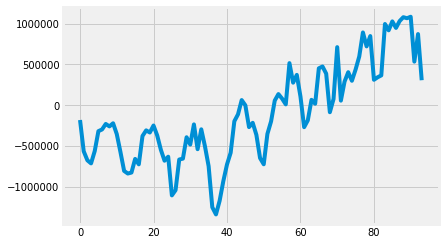

In [70]:
#- put your code here
monthly_totals.assign(diff=monthly_totals.get('SOLAR') - monthly_totals.get('WIND TOTAL')).get('diff').plot()

**Question 4.8.** Create a table called `hourly_averages_july_2016` which contains the average output of every energy source by hour in the month of July 2016. Your table should not contain DAY, MONTH, or YEAR columns.

Your answer should look like this (The numbers are intentionally left in the table so that you can check your answer):

<img width=70% src="./q48_output.png"/>

In [71]:
#... hourly_averages_july_2016
hourly_averages_july_2016 = energy_with_time[
    (energy_with_time.get('YEAR') == 2016)
    &
    (energy_with_time.get('MONTH') == 7)
].groupby('HOUR').mean().drop(columns=['YEAR', 'MONTH', 'DAY'])
hourly_averages_july_2016

,BIOGAS,BIOMASS,GEOTHERMAL,SMALL HYDRO,SOLAR,SOLAR THERMAL,WIND TOTAL
HOUR,,,,,,,
0,185.193548,226.322581,948.225806,320.129032,0.000000,0.000000,2865.225806
1,187.806452,225.290323,948.838710,311.483871,0.000000,0.000000,3065.548387
2,188.064516,226.387097,948.548387,302.419355,0.000000,0.000000,2982.419355
3,188.451613,227.225806,949.322581,300.193548,0.000000,0.000000,2821.322581
4,188.774194,232.612903,949.161290,300.096774,2.677419,0.000000,2597.806452
...,...,...,...,...,...,...,...
19,187.387097,249.774194,944.129032,485.096774,614.419355,62.258065,3035.870968
20,187.806452,249.903226,945.193548,461.516129,0.000000,2.806452,3113.322581
21,188.290323,246.903226,946.483871,402.709677,0.000000,0.000000,3159.322581


In [72]:
hourly_averages_july_2016.get('BIOGAS').sum()

4495.806451612903

In [73]:
hourly_averages_july_2016.get('BIOMASS').sum()

5798.451612903226

In [74]:
_ = ok.grade('q4_8')

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 4.9.** Plot the hourly average production of solar, wind, and geothermal in July 2016 in a single plot.

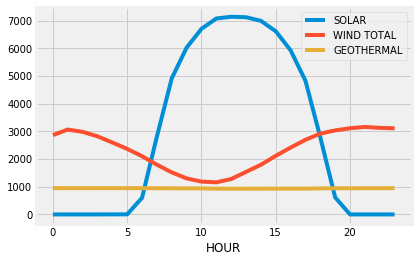

In [75]:
#- put your code here
hourly_averages_july_2016.get(['SOLAR', 'WIND TOTAL', 'GEOTHERMAL']).plot()

You should see that solar production is zero at night, but reaches a peak in the afternoon. On the other hand, wind output is highest at night.

# Finish Line

Congratulations, you're done with the project!  Be sure to

- **Verify that all tests pass** (the next cell has a shortcut for that), 
- **Save and Checkpoint** from the `File` menu,
- **Run the last cell to submit your work**

### You *do not* need to submit a notebook to Gradescope for this project!

In [114]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir('tests') if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------

In [115]:
_ = ok.submit()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'project.ipynb'.
Submit... 100% complete
Submission successful for user: j1feng@ucsd.edu
URL: https://okpy.org/ucsd/dsc10/sp20/project01/submissions/4z6Zm6

